<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[:,:])
print(iris.target) #druh kosatce
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [8]:
from sklearn.model_selection import train_test_split
X=iris.data #
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1) # % of the measurement points taken randomly for testing
print(X.shape) # 150 measurements
print(X_train.shape) # training data
print(X_test.shape) # testing data
print(y_train.shape)
print(y_test.shape)

(150, 4)
(135, 4)
(15, 4)
(135,)
(15,)


In [9]:
# training and testing the classifier
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

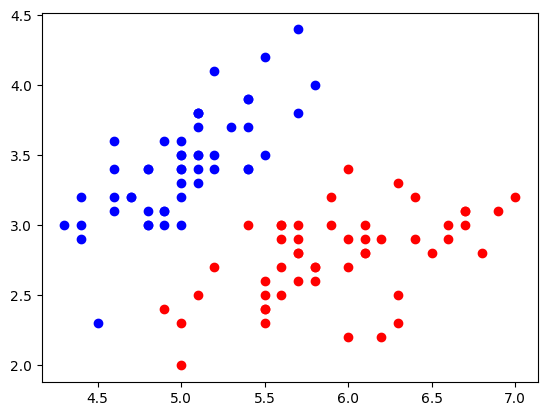

In [12]:
# Choose only first two features (columns) of iris.data
# SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data
X = iris.data[:,0:2]
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1], color='blue') # y==0  1 z 3 ruznych typu kosatcu
plt.scatter(X[y==1,0],X[y==1,1], color='red')
plt.scatter(X[y==2,0],X[y==2,1], color='cyan')

In [36]:
X = iris.data[iris.target!=2,0:2]
y = iris.target[iris.target!=2]


SVMmodel_1=SVC(kernel='linear', c=200)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.1)

SVMmodel_1.fit(X_train_1,y_train_1)
SVMmodel_1.get_params()
SVMmodel_1.score(X_test_1,y_test_1)

1.0

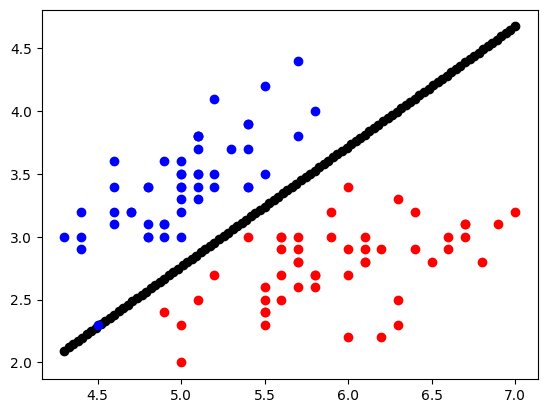

In [41]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here



#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_

import numpy as np

x1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2 = -b/W[0,1]-W[0,0]/W[0,1]*x1 # from the equation for line
plt.scatter(x1, x2, color = 'black')
plt.scatter(X[y==0,0],X[y==0,1], color='blue')
plt.scatter(X[y==1,0],X[y==1,1], color='red')


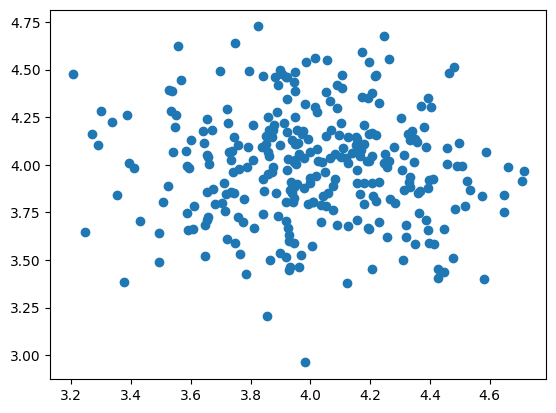

In [42]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random # guess this is the object of your next study m'lady

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


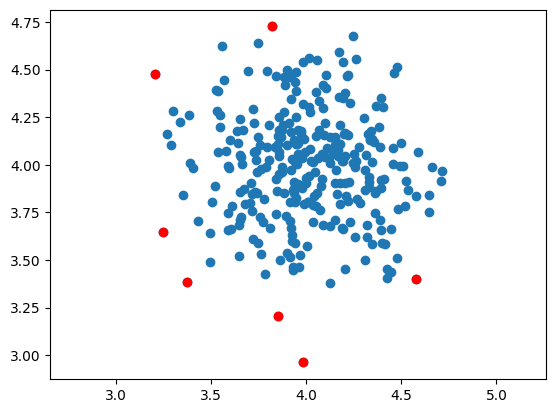

In [44]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
print(pred)
anom_index = where(pred==-1) # index of the values that are out of range for the class
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

8.99269220494228


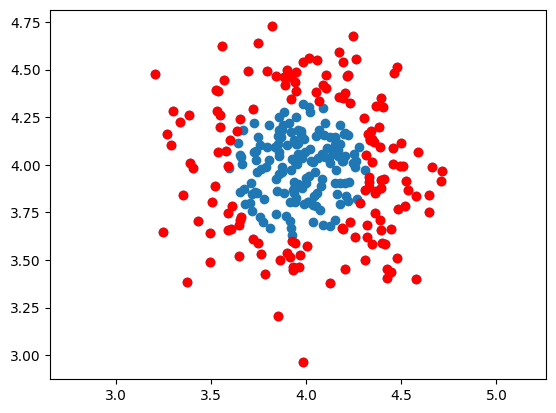

In [46]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01) # 1 % quantile: 1 % of the data that is most far away from the average
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()